In [32]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/home/venkat/Documents/Training_Code/Notebook training/learn ds training/datasets/loanf.csv')
df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


Text(0,0.5,'interest rate')

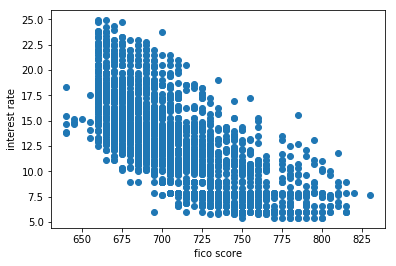

In [43]:
interest=df['Interest.Rate']
score=df['FICO.Score']
plt.scatter(score,interest)
plt.xlabel('fico score')
plt.ylabel('interest rate')

In [46]:
loans_data=pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')
loans_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [66]:
loans_data['Loan.Length']=loans_data['Loan.Length'].str.replace('months','')
loans_data.dtypes

Amount.Requested                    int64
Amount.Funded.By.Investors        float64
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [67]:
df = pd.read_csv('/home/venkat/Documents/Training_Code/Notebook training/learn ds training/datasets/loanf.csv')
df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


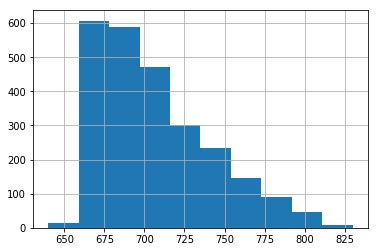

In [70]:
df['FICO.Score'].hist()

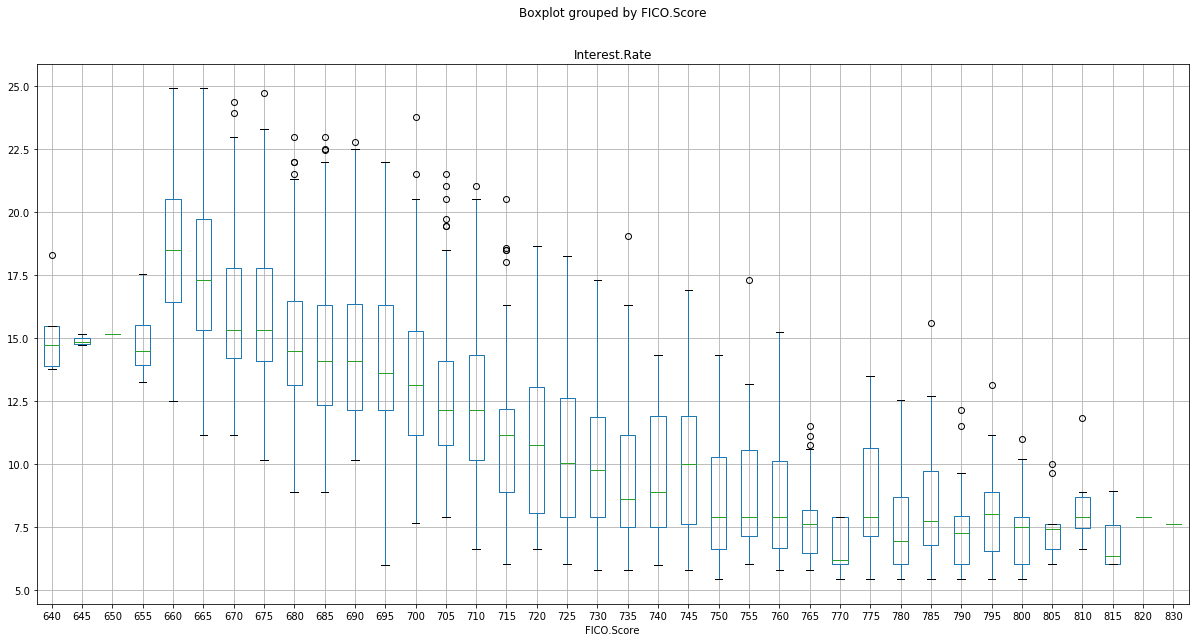

In [74]:
df.boxplot('Interest.Rate','FICO.Score',figsize=[20,10])

/home/venkat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a66701908>,
      dtype=object)

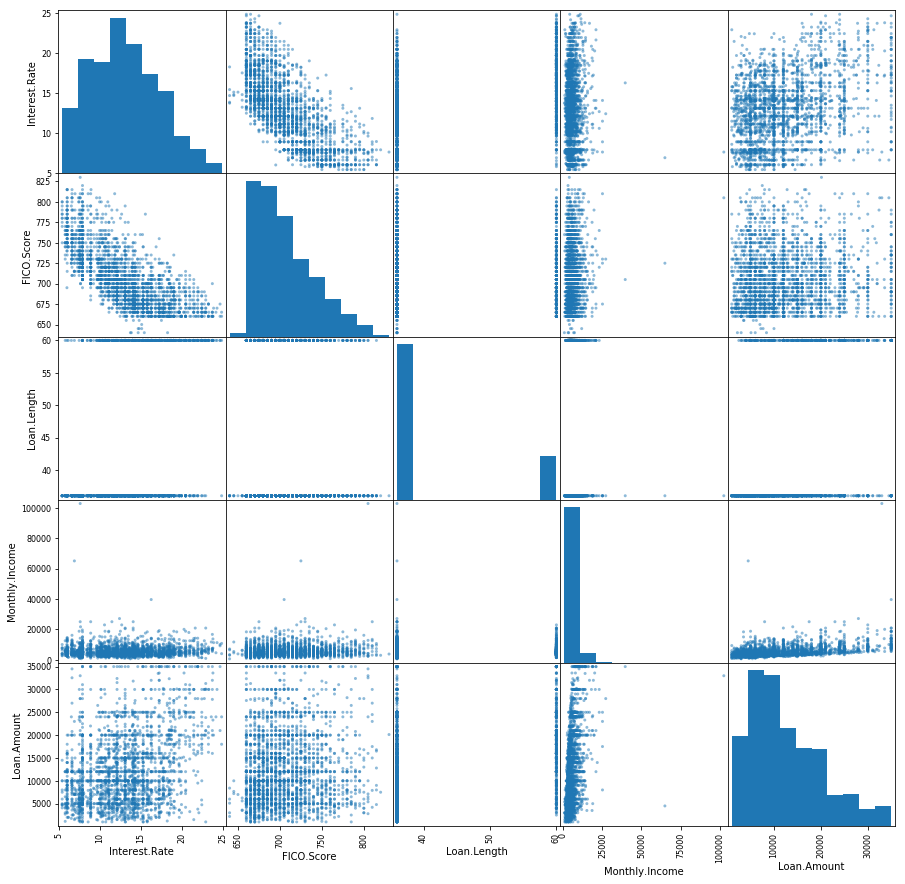

In [79]:
pd.scatter_matrix(df,alpha=0.5,figsize=(15,15))

In [90]:
X=df.loc[:,['FICO.Score','Loan.Amount']]
y=df.loc[:,'Interest.Rate']

In [97]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X,y)
print(regressor.intercept_,regressor.coef_)

72.88279831676904 [-0.08844242  0.00021075]


In [116]:
df['TF']=df['Interest.Rate']<12
df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount,TF
6,15.31,670,36,4891.67,6000,False
11,19.72,670,36,3575.00,2000,False
12,14.27,665,36,4250.00,10625,False
13,21.67,670,60,14166.67,28000,False
21,21.98,665,36,6666.67,22000,False


In [118]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
X=df.loc[:,['FICO.Score','Loan.Amount']]
y=df.loc[:,['TF']]

In [119]:
regressor.fit(X,y)

/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
regressor.intercept_,regressor.coef_

(array([-0.00054065]), array([[ 7.49293728e-04, -7.38828059e-05]]))

In [134]:
X_test=pd.DataFrame({'fico_score':[720,720,720,820,820,820],'loan_amount':[10000,20000,30000,10000,20000,30000]})
X_test

,fico_score,loan_amount
0,720,10000
1,720,20000
2,720,30000
3,820,10000
4,820,20000
5,820,30000


In [170]:
y_test_predict_ans=regressor.predict_proba(X_test)
y_test_predict_ans

array([[0.54980361, 0.45019639],
       [0.71883806, 0.28116194],
       [0.84257763, 0.15742237],
       [0.53119639, 0.46880361],
       [0.70344895, 0.29655105],
       [0.83238201, 0.16761799]])

In [137]:
y_test_ans=regressor.predict(X_test)



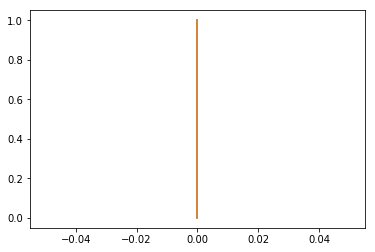

In [169]:
plt.plot(y_test_ans,X_test.loc[:,'fico_score']==720)
plt.plot(y_test_ans,X_test.loc[:,'fico_score']==820)

In [160]:
X_test.loc[:,'fico_score']

0    720
1    720
2    720
3    820
4    820
5    820
Name: fico_score, dtype: int64

In [157]:
y_test_predict_ans[:,1]

array([0.45019639, 0.28116194, 0.15742237, 0.46880361, 0.29655105,
       0.16761799])